<a href="https://colab.research.google.com/github/JeonginWon/DataAnalysisProject-Household-Loan-Delinquency-Rate-Prediction-Model/blob/main/Regression_%EB%B6%80%EC%82%B0x%EC%97%B0%EC%B2%B4%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 부산 지역 데이터를 활용한 y= 연체율 일때, 상관관계분석 및 회귀모델링 + VIF

In [ ]:
#필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
!unzip -o NotoSansCJKkr-hinted.zip
!mv NotoSansCJKkr* /usr/share/fonts/

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.addfont(path='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
prop = fm.FontProperties(fname='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.weight'] = prop.get_weight()

--2023-08-09 15:23:30--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.203.128, 173.194.202.128, 74.125.20.128, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  57.8MB/s    in 2.0s    

2023-08-09 15:23:33 (57.8 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: No

In [ ]:
#데이터 불러오기
total= pd.read_csv("/content/drive/MyDrive/전처리_원정인/최최종 데이터 (1).csv",encoding = "euc-kr")
total

,날짜,지역,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,...,예금은행 주택담보 대출금,아파트매매가격지수,주택시장소비심리지수,소비자물가지수,이혼건수,교육비출전망지수,부동산지수,파산수,회생수,Unnamed: 22
0,2016-01,강원도,3.7,52.5,0.02,0.2010,0.0,11411.7,4071.0,3167.5,...,3517.8,101.1,130.9,94.6230,262.0,108.0,96.1,68.0,191.0,NaN
1,2016-01,경기도,4.0,60.3,0.46,0.0880,0.0,71125.9,25227.0,32904.4,...,112075.3,76.5,116.6,95.1310,2281.0,113.0,81.1,756.0,1883.0,NaN
2,2016-01,경상도,3.1,59.6,0.44,0.2065,0.0,56610.0,15687.0,10732.1,...,24327.9,112.4,101.6,95.9115,1072.0,109.0,103.8,216.0,382.0,NaN
3,2016-01,광주광역시,3.2,57.5,0.56,0.2430,0.0,12222.2,2667.0,2900.2,...,7881.9,91.1,108.1,95.4100,251.0,111.0,89.5,210.0,345.0,NaN
4,2016-01,대구광역시,3.6,58.6,0.08,0.3230,0.0,19717.7,3432.0,6034.9,...,17744.7,85.9,91.1,94.7190,408.0,108.0,85.2,411.0,670.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
total.columns

Index(['날짜', '지역', '실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '파산수', '회생수', 'Unnamed: 22'],
      dtype='object')

In [ ]:
total = total.drop ('Unnamed: 22',axis =1)
#결측치 제거
total = total.dropna()

In [ ]:
total

,날짜,지역,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,...,전세수급동향,예금은행 주택담보 대출금,아파트매매가격지수,주택시장소비심리지수,소비자물가지수,이혼건수,교육비출전망지수,부동산지수,파산수,회생수
0,2016-01,강원도,3.70,52.50000,0.020,0.2010,0.0,11411.7,4071.0,3167.5,...,112.40,3517.8,101.1,130.9,94.6230,262.0,108.0,96.10,68.0,191.0
1,2016-01,경기도,4.00,60.30000,0.460,0.0880,0.0,71125.9,25227.0,32904.4,...,112.80,112075.3,76.5,116.6,95.1310,2281.0,113.0,81.10,756.0,1883.0
2,2016-01,경상도,3.10,59.60000,0.440,0.2065,0.0,56610.0,15687.0,10732.1,...,112.30,24327.9,112.4,101.6,95.9115,1072.0,109.0,103.80,216.0,382.0
3,2016-01,광주광역시,3.20,57.50000,0.560,0.2430,0.0,12222.2,2667.0,2900.2,...,113.10,7881.9,91.1,108.1,95.4100,251.0,111.0,89.50,210.0,345.0
4,2016-01,대구광역시,3.60,58.60000,0.080,0.3230,0.0,19717.7,3432.0,6034.9,...,113.50,17744.7,85.9,91.1,94.7190,408.0,108.0,85.20,411.0,670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,2023-05,울산광역시,3.60,60.10000,1.220,-0.0210,0.0,18169.6,1948.0,3588.0,...,101.95,8939.2,91.2,100.9,111.0700,186.0,98.0,93.40,92.0,324.0
1153,2023-05,인천광역시,3.10,63.80000,0.180,0.0840,0.0,32771.1,6111.0,8755.4,...,101.10,44288.8,90.6,97.1,111.3300,563.0,95.0,94.00,355.0,871.0
1154,2023-05,전라도,2.05,66.45000,0.095,-0.0045,0.0,69136.7,6332.0,8347.6,...,100.50,13137.3,94.0,93.9,111.4300,588.0,95.0,100.25,117.0,300.0
1155,2023-05,제주,1.90,69.40000,0.000,-0.0140,0.0,17121.3,943.0,4946.4,...,101.00,3873.1,103.8,96.3,111.3400,138.0,94.0,102.20,35.0,129.0


# 부산광역시 데이터
종속변수(Y)  = '연체율' 2019.12-2022년도

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [ ]:
#부산데이터
busan = total[total['지역'] == '부산광역시']
busan.head()

,날짜,지역,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,...,전세수급동향,예금은행 주택담보 대출금,아파트매매가격지수,주택시장소비심리지수,소비자물가지수,이혼건수,교육비출전망지수,부동산지수,파산수,회생수
6,2016-01,부산광역시,4.4,55.8,0.27,0.256,0.0,23102.0,9824.0,8381.7,...,112.0,27455.7,85.9,117.7,95.130,593.0,103.0,86.8,218.0,414.0
19,2016-02,부산광역시,5.3,56.0,0.34,0.262,0.0,23280.8,7329.0,8381.6,...,109.5,27424.9,86.0,121,95.870,509.0,105.0,86.9,184.0,394.0
32,2016-03,부산광역시,4.2,55.9,0.19,0.339,1.0,24292.7,10655.0,8423.8,...,87.6,27637.4,86.1,122.9,95.623,579.0,104.0,87.0,292.0,452.0
45,2016-04,부산광역시,3.8,56.5,0.15,0.313,0.0,24216.8,10233.0,8490.7,...,80.3,28125.9,86.2,126.4,95.841,552.0,100.0,83.4,281.0,438.0
58,2016-05,부산광역시,4.0,56.2,0.25,0.351,0.0,24355.4,10955.0,8653.3,...,107.4,28565.0,86.4,124.8,95.907,583.0,97.0,87.2,291.0,457.0


In [ ]:
# 날짜를 datetime 형식으로 변환
busan['날짜'] = pd.to_datetime(busan['날짜'])

# 원하는 기간의 데이터 추출 (2019년 12월부터 2022년 12월까지)
start_date = '2019-12-01'
end_date = '2022-12-31'
busan = busan[(busan['날짜'] >= start_date) & (busan['날짜'] <= end_date)]


<ipython-input-10-2bf3acff0c39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan['날짜'] = pd.to_datetime(busan['날짜'])


In [ ]:
busan.head()

,날짜,지역,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,...,전세수급동향,예금은행 주택담보 대출금,아파트매매가격지수,주택시장소비심리지수,소비자물가지수,이혼건수,교육비출전망지수,부동산지수,파산수,회생수
617,2019-12-01,부산광역시,3.1,57.0,0.11,0.347,0.0,32386.2,19484.0,12824.1,...,92.1,39787.6,85.6,112.2,99.918,566.0,94.0,89.1,468.0,705.0
630,2020-01-01,부산광역시,3.8,56.2,0.08,0.320,0.0,32444.1,13416.0,12765.5,...,105.4,39805.2,85.8,107.1,100.060,450.0,94.0,89.3,416.0,606.0
643,2020-02-01,부산광역시,4.3,55.9,0.08,0.305,0.0,32820.4,10555.0,12746.8,...,112.8,39904.6,85.9,107.3,100.180,490.0,90.0,89.4,395.0,619.0
656,2020-03-01,부산광역시,4.3,55.7,0.04,0.203,0.0,33285.9,10879.0,12706.7,...,94.8,40509.7,85.9,100.3,99.910,257.0,81.0,89.4,481.0,741.0
669,2020-04-01,부산광역시,5.0,54.3,0.13,0.191,0.0,33910.4,8844.0,12641.0,...,97.0,40691.4,85.8,98.3,99.550,723.0,74.0,89.3,442.0,671.0


In [ ]:
#종속변수 연체율 붙이기
delay= pd.read_csv("/content/drive/MyDrive/전처리_원정인/데이터/연체율.csv",encoding = "euc-kr")
delay

,날짜,지역,연체율
0,2019-12-01,강원도,0.13
1,2019-12-01,경기도,0.24
2,2019-12-01,경상도,0.33
3,2019-12-01,광주광역시,0.31
4,2019-12-01,대구광역시,0.26
...,...,...,...
541,NaN,NaN,0.20
542,NaN,NaN,0.21
543,NaN,NaN,0.18
544,NaN,NaN,0.65


In [ ]:
#결측치 제거
delay = delay.dropna()
delay

,날짜,지역,연체율
0,2019-12-01,강원도,0.13
1,2019-12-01,경기도,0.24
2,2019-12-01,경상도,0.33
3,2019-12-01,광주광역시,0.31
4,2019-12-01,대구광역시,0.26
...,...,...,...
476,2022-12-01,울산광역시,0.17
477,2022-12-01,인천광역시,0.16
478,2022-12-01,전라도,0.14
479,2022-12-01,제주,0.42


In [ ]:
# 날짜를 datetime 형식으로 변환
delay['날짜'] = pd.to_datetime(delay['날짜'])

# 원본 데이터 프레임과 연체율 데이터 프레임을 병합
busan = pd.merge(busan, delay, on=['날짜', '지역'], how='left')

# 병합된 데이터 프레임 출력
busan.head()

<ipython-input-15-178977944b52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay['날짜'] = pd.to_datetime(delay['날짜'])


,날짜,지역,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,...,예금은행 주택담보 대출금,아파트매매가격지수,주택시장소비심리지수,소비자물가지수,이혼건수,교육비출전망지수,부동산지수,파산수,회생수,연체율
0,2019-12-01,부산광역시,3.1,57.0,0.11,0.347,0.0,32386.2,19484.0,12824.1,...,39787.6,85.6,112.2,99.918,566.0,94.0,89.1,468.0,705.0,0.34
1,2020-01-01,부산광역시,3.8,56.2,0.08,0.320,0.0,32444.1,13416.0,12765.5,...,39805.2,85.8,107.1,100.060,450.0,94.0,89.3,416.0,606.0,0.37
2,2020-02-01,부산광역시,4.3,55.9,0.08,0.305,0.0,32820.4,10555.0,12746.8,...,39904.6,85.9,107.3,100.180,490.0,90.0,89.4,395.0,619.0,0.39
3,2020-03-01,부산광역시,4.3,55.7,0.04,0.203,0.0,33285.9,10879.0,12706.7,...,40509.7,85.9,100.3,99.910,257.0,81.0,89.4,481.0,741.0,0.35
4,2020-04-01,부산광역시,5.0,54.3,0.13,0.191,0.0,33910.4,8844.0,12641.0,...,40691.4,85.8,98.3,99.550,723.0,74.0,89.3,442.0,671.0,0.37


In [ ]:
busan.columns

Index(['날짜', '지역', '실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '파산수', '회생수', '연체율'],
      dtype='object')

## 상관관계 분석

In [ ]:
#상관관계 분석
correlation_matrix = busan.corr()

# 기초 통계 정보
summary_statistics = busan.describe()
print("상관관계 행렬:")
print(correlation_matrix)
print("\n기초 통계 정보:")
print(summary_statistics)

상관관계 행렬:
                    실업률       고용률     어음부도율     지가변동률     상장회사수  비은행예금취급기관_금액  \
실업률            1.000000 -0.838214 -0.067755 -0.004073  0.080957     -0.642405   
고용률           -0.838214  1.000000  0.137652 -0.210595 -0.025396      0.684621   
어음부도율         -0.067755  0.137652  1.000000  0.041417 -0.091610      0.032541   
지가변동률         -0.004073 -0.210595  0.041417  1.000000 -0.065028     -0.415118   
상장회사수          0.080957 -0.025396 -0.091610 -0.065028  1.000000      0.096528   
비은행예금취급기관_금액  -0.642405  0.684621  0.032541 -0.415118  0.096528      1.000000   
주택거래량          0.342309 -0.337042  0.195687  0.510952  0.019181     -0.732165   
예금은행 기타 가계대출금 -0.301777  0.035048 -0.215692  0.518625  0.178592      0.193782   
매매수급동향        -0.316840  0.072749 -0.163486  0.568672  0.088605      0.195639   
월세수급동향        -0.659107  0.499109 -0.087726  0.068213  0.095929      0.817168   
전세수급동향        -0.147599  0.050171 -0.188847  0.136978 -0.114832     -0.146101   
예금은행 주택담보 대출금 -0.64

<ipython-input-18-cff04818e762>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = busan.corr()


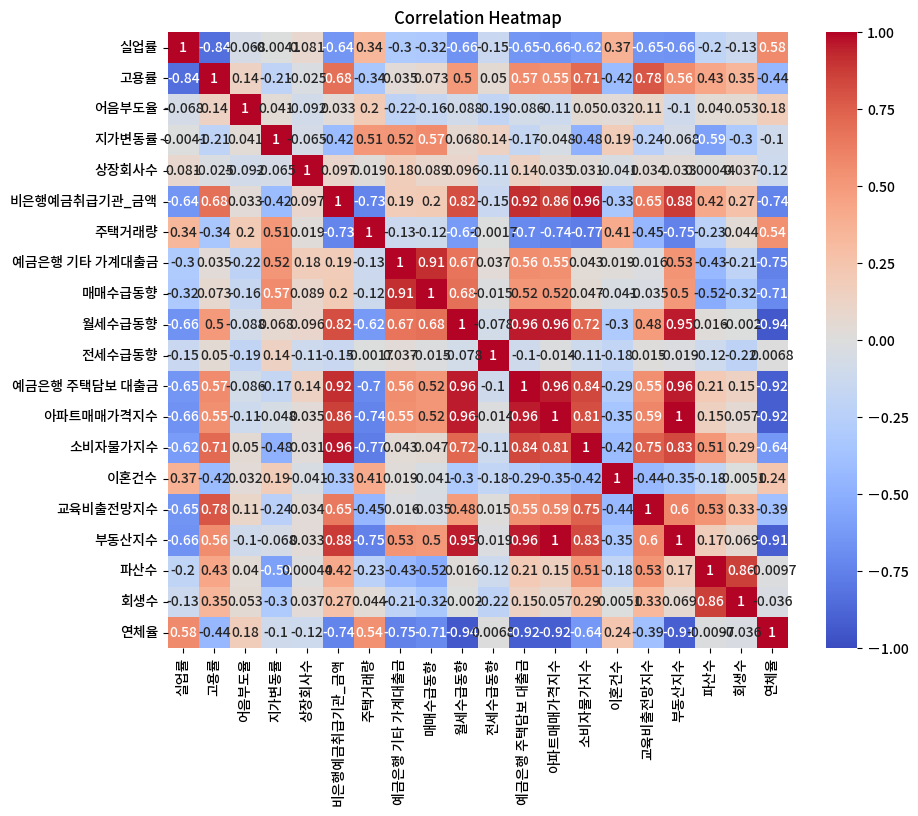

In [ ]:
# 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#그냥 맨땅에 회귀분석
#독립변수 전체 회귀분석
busan['주택시장소비심리지수'] = busan['주택시장소비심리지수'].astype('float')

# 회귀 분석을 위한 모델 생성
X = busan[['실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '회생수']]
X = sm.add_constant(X)  # 상수항 추가
y = busan['연체율']

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

# 회귀 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    연체율   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     23.30
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.26e-08
Time:                        15:28:12   Log-Likelihood:                 110.40
No. Observations:                  37   AIC:                            -180.8
Df Residuals:                      17   BIC:                            -148.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2818      2.267      0.124

## 다중공선성 문제 해결

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 설명 변수 리스트
explanatory_vars = ['실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '회생수']

# 설명 변수 데이터프레임
explanatory_data = busan[explanatory_vars]

#################### 상수항 추가
explanatory_data_with_const = add_constant(explanatory_data)

# VIF 계산
vif = pd.DataFrame()
vif["Variable"] = explanatory_data_with_const.columns
vif["VIF"] = [variance_inflation_factor(explanatory_data_with_const.values, i) for i in range(explanatory_data_with_const.shape[1])]

# VIF 출력
print(vif)

         Variable            VIF
0           const  582891.963026
1             실업률      13.721169
2             고용률      18.457708
3           어음부도율       1.514557
4           지가변동률      39.500789
5           상장회사수       2.198215
6    비은행예금취급기관_금액     252.742098
7           주택거래량      14.622436
8   예금은행 기타 가계대출금      70.930812
9          매매수급동향      50.324205
10         월세수급동향     209.692998
11         전세수급동향       1.942609
12  예금은행 주택담보 대출금     574.169191
13      아파트매매가격지수   36748.961687
14     주택시장소비심리지수      27.350725
15        소비자물가지수     144.868326
16           이혼건수       2.919926
17       교육비출전망지수       7.478046
18          부동산지수   40694.260743
19            회생수       2.921916


In [ ]:
#정규화
#min-max정규화
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 기존 데이터프레임 복사
normalized_1 =busan.copy()

# 정규화할 열 선택
columns_to_normalize = ['실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '회생수']

# Min-Max 스케일러 객체 생성
scaler = MinMaxScaler()

# 선택한 열을 정규화하여 새로운 데이터프레임 업데이트
normalized_1[columns_to_normalize] = scaler.fit_transform(normalized_1[columns_to_normalize])

# 정규화된 데이터프레임 출력
print(normalized_1)

           날짜     지역       실업률       고용률     어음부도율     지가변동률  상장회사수  \
0  2019-12-01  부산광역시  0.228571  0.743590  0.454545  0.760259    0.0   
1  2020-01-01  부산광역시  0.428571  0.538462  0.318182  0.701944    0.0   
2  2020-02-01  부산광역시  0.571429  0.461538  0.318182  0.669546    0.0   
3  2020-03-01  부산광역시  0.571429  0.410256  0.136364  0.449244    0.0   
4  2020-04-01  부산광역시  0.771429  0.051282  0.545455  0.423326    0.0   
5  2020-05-01  부산광역시  0.857143  0.128205  0.318182  0.475162    0.0   
6  2020-06-01  부산광역시  0.742857  0.333333  0.545455  0.658747    0.0   
7  2020-07-01  부산광역시  0.714286  0.384615  0.136364  0.732181    0.0   
8  2020-08-01  부산광역시  0.400000  0.435897  0.500000  0.619870    0.0   
9  2020-09-01  부산광역시  0.371429  0.435897  0.090909  0.654428    0.0   
10 2020-10-01  부산광역시  0.342857  0.512821  0.772727  0.738661    0.0   
11 2020-11-01  부산광역시  0.257143  0.589744  0.727273  1.000000    1.0   
12 2020-12-01  부산광역시  0.485714  0.358974  0.454545  0.969762    0.0   
13 202

In [ ]:
# 설명 변수 리스트
explanatory_vars = ['실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '회생수']

# 설명 변수 데이터프레임
explanatory_data = normalized_1[explanatory_vars]

#################### 상수항 추가
explanatory_data_with_const = add_constant(explanatory_data)

# VIF 계산
vif = pd.DataFrame()
vif["Variable"] = explanatory_data_with_const.columns
vif["VIF"] = [variance_inflation_factor(explanatory_data_with_const.values, i) for i in range(explanatory_data_with_const.shape[1])]

# VIF 출력
print(vif)

         Variable           VIF
0           const    429.087964
1             실업률     13.721169
2             고용률     18.457708
3           어음부도율      1.514557
4           지가변동률     39.500789
5           상장회사수      2.198215
6    비은행예금취급기관_금액    252.742098
7           주택거래량     14.622436
8   예금은행 기타 가계대출금     70.930812
9          매매수급동향     50.324205
10         월세수급동향    209.692998
11         전세수급동향      1.942609
12  예금은행 주택담보 대출금    574.169191
13      아파트매매가격지수  36748.961687
14     주택시장소비심리지수     27.350725
15        소비자물가지수    144.868326
16           이혼건수      2.919926
17       교육비출전망지수      7.478046
18          부동산지수  40694.260743
19            회생수      2.921916


쪼까 줄음 근데 여전히 높음

In [ ]:
# 두번째 정규화
# Z-score 정규화
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 날짜와 지역 열은 제외하고 정규화할 열 선택
columns_to_normalize = ['실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '회생수','연체율']

# Z-score 정규화
scaler = StandardScaler()
z_score_normalized = scaler.fit_transform(busan[columns_to_normalize])

# 정규화된 데이터프레임 생성
normalized_2 = pd.DataFrame(z_score_normalized, columns=columns_to_normalize)

# 날짜와 지역 열 추가
normalized_2[['날짜', '지역']] = busan[['날짜', '지역']]


In [ ]:
normalized_2

,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,매매수급동향,월세수급동향,...,아파트매매가격지수,주택시장소비심리지수,소비자물가지수,이혼건수,교육비출전망지수,부동산지수,회생수,연체율,날짜,지역
0,-0.455124,0.674873,0.482825,0.602918,-0.395285,-1.616592,2.123385,-1.182927,-1.497620,-1.878471,...,-1.422677,0.251258,-1.016563,0.709752,0.920168,-1.432877,0.591976,1.307340,2019-12-01,부산광역시
1,0.341343,-0.124177,-0.112659,0.319075,-0.395285,-1.600779,0.878551,-1.271941,-1.295229,-1.638136,...,-1.397622,-0.087160,-0.972302,-0.735341,0.920168,-1.400609,-0.972532,1.778492,2020-01-01,부산광역시
2,0.910248,-0.423820,-0.112659,0.161384,-0.395285,-1.498008,0.291625,-1.300347,-1.194033,-1.552855,...,-1.385095,-0.073889,-0.934899,-0.237033,0.345548,-1.384475,-0.767091,2.092593,2020-02-01,부산광역시
3,0.910248,-0.623582,-0.906639,-0.910911,-0.395285,-1.370876,0.358093,-1.361260,-1.215718,-1.537350,...,-1.385095,-0.538385,-1.019057,-3.139676,-0.947346,-1.384475,1.160888,1.464391,2020-03-01,부산광역시
4,1.706715,-2.021918,0.879815,-1.037064,-0.395285,-1.200320,-0.059382,-1.461059,-1.649414,-1.808696,...,-1.397622,-0.671098,-1.131267,2.665610,-1.952931,-1.400609,0.054670,1.778492,2020-04-01,부산광역시
5,2.048058,-1.722275,-0.112659,-0.784759,-0.395285,-1.197535,-0.028610,-1.444502,-1.519305,-1.684652,...,-1.410150,-0.379129,-1.137501,1.145771,-1.091001,-1.400609,-0.609060,1.935542,2020-05-01,부산광역시
6,1.592934,-0.923226,0.879815,0.108821,-0.395285,-1.010783,1.514097,-1.344854,-1.447022,-1.630383,...,-1.410150,0.357428,-1.087630,0.186529,-1.234656,-1.384475,1.066069,0.993239,2020-06-01,부산광역시
7,1.479153,-0.723463,-0.906639,0.466253,-0.395285,-0.866992,1.620364,-1.132952,-0.608543,-1.141959,...,-1.322460,0.065460,-1.125033,1.955522,-1.091001,-1.303805,0.307520,1.150289,2020-07-01,부산광역시
8,0.227562,-0.523701,0.681320,-0.080408,-0.395285,-0.795847,0.338399,-0.802718,-0.406151,-0.955893,...,-1.259824,0.264529,-0.944250,-0.199660,-0.803691,-1.239269,-2.331599,1.307340,2020-08-01,부산광역시
9,0.113781,-0.523701,-1.105134,0.087795,-0.395285,-0.701898,0.432356,-0.603575,-0.268814,-0.800838,...,-1.172134,0.695847,-0.744765,0.236360,-2.096585,-1.158599,-0.087558,0.522087,2020-09-01,부산광역시


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#VIF다중공선성
# 설명 변수 리스트
explanatory_vars =['실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '회생수','연체율']

# 설명 변수 데이터프레임
explanatory_data = normalized_2[explanatory_vars]

#################### 상수항 추가
explanatory_data_with_const = add_constant(explanatory_data)

# VIF 계산
vif = pd.DataFrame()
vif["Variable"] = explanatory_data_with_const.columns
vif["VIF"] = [variance_inflation_factor(explanatory_data_with_const.values, i) for i in range(explanatory_data_with_const.shape[1])]

# VIF 출력
print(vif)


         Variable           VIF
0           const      1.000000
1             실업률     14.427042
2             고용률     18.728477
3           어음부도율      1.573755
4           지가변동률     39.522134
5           상장회사수      2.218691
6    비은행예금취급기관_금액    252.906560
7           주택거래량     17.834298
8   예금은행 기타 가계대출금     70.956147
9          매매수급동향     50.324903
10         월세수급동향    209.706629
11         전세수급동향      2.061883
12  예금은행 주택담보 대출금    587.624103
13      아파트매매가격지수  39300.004566
14     주택시장소비심리지수     27.742905
15        소비자물가지수    151.152654
16           이혼건수      2.963108
17       교육비출전망지수      8.531311
18          부동산지수  43044.453037
19            회생수      2.923472
20            연체율     27.043507


In [ ]:
#다중공선성 제거하고 다시 회귀분석
#회귀분석

# 회귀 분석을 위한 모델 생성
X = normalized_2[['실업률', '고용률', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '매매수급동향', '월세수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '주택시장소비심리지수', '소비자물가지수', '이혼건수', '교육비출전망지수', '부동산지수',
       '회생수']]
X = sm.add_constant(X)  # 상수항 추가
y = normalized_2['연체율']

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

# 회귀 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    연체율   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     23.30
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.26e-08
Time:                        15:30:51   Log-Likelihood:                 8.5020
No. Observations:                  37   AIC:                             23.00
Df Residuals:                      17   BIC:                             55.21
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.272e-16      0.047   4.87e-15

# 로지스틱 회귀분석